In [1]:
import cv2

# Loading the images that shoud be combined
image1 = cv2.imread('../data/0a59be2e7dd53d6de11a10ce3649c081/end-farmingdale.png')
#image2 = cv2.imread('image2.jpg')


In [20]:
import cv2
import matplotlib.pyplot as plt

# Loading the image
image1 = cv2.imread('../data/0a59be2e7dd53d6de11a10ce3649c081/end-farmingdale.png')
image2 = cv2.imread('../data/0a59be2e7dd53d6de11a10ce3649c081/thumbnail.png')

# # Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
# image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# # Display the image using Matplotlib
# plt.imshow(image1_rgb)
# plt.axis('off')  # Hide the axis
# plt.show()


In [6]:
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

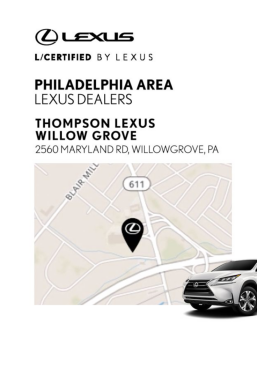

In [7]:
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image2_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [8]:
combined_img = cv2.hconcat([image1, image2])

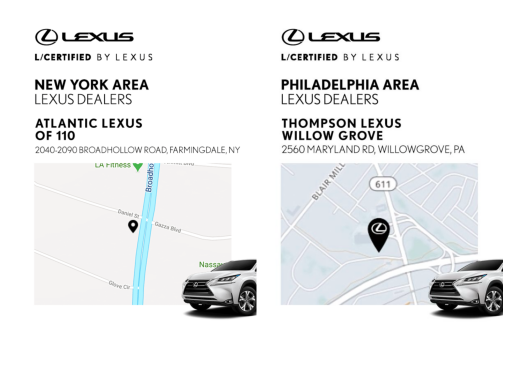

In [9]:
plt.imshow(combined_img)
plt.axis('off')  # Hide the axis
plt.show()

In [42]:
def combine_images(image1, image2):
    crp1 = image1[100:300, 200:400] 
    crp2 = image2[50:250, 250:450]

    # crp1 = image1
    # crp2 = image2


    image1[100:300, 200:400] = crp2 
    image2[50:250, 250:450] = crp1

    # image1 = crp2 
    # image2 = crp1
    

    return image1, image2

In [49]:
def combine_images(image1, image2, region1, region2):
    # Extract coordinates for regions
    x1, y1, x2, y2 = region1
    x3, y3, x4, y4 = region2
    
    # Crop the specified regions
    crp1 = image1[y1:y2, x1:x2]
    crp2 = image2[y3:y4, x3:x4]

    # Swap the cropped regions
    image1[y1:y2, x1:x2] = crp2 
    image2[y3:y4, x3:x4] = crp1

    return image1, image2

In [50]:
image1 = cv2.imread('../data/0a59be2e7dd53d6de11a10ce3649c081/end-farmingdale.png')
image2 = cv2.imread('../data/0a59be2e7dd53d6de11a10ce3649c081/thumbnail-new.jpg')

In [51]:

# image1_crop = [100:300, 200:400]
# image2_crop = [50:250, 250:450]
# image3, image4 = combine_images(image1[50:100, 100:200] , image2[50:250, 250:450] )

# image3, image4 = combine_images(image1 , image2)

region1 = (200, 100, 400, 300)
region2 = (250, 50, 450, 250)

combined_image1, combined_image2 = combine_images(image1, image2, region1, region2)

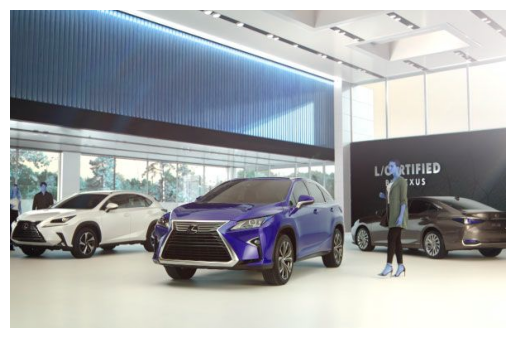

In [53]:
plt.imshow(combined_image2)
plt.axis('off')  # Hide the axis
plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image_path, size):
    image_read = cv2.imread(image_path)
    image_resize = cv2.resize(image_read, size)

    return image_resize

def image_read(image_path):
    return cv2.imread(image_path)


def combine_multiple_images(images, regions):
    """
    Combine regions of multiple images by swapping the specified regions.

    Parameters:
    images (list of np.ndarray): List of images to be processed.
    regions (list of tuples): List of regions to be swapped in the format (x1, y1, x2, y2).

    Returns:
    list of np.ndarray: List of images with swapped regions.
    """
    # Ensure there are as many regions as images
    if len(images) != len(regions):
        raise ValueError("The number of images and regions must be the same")

    # Create a copy of the original images to modify
    modified_images = [img.copy() for img in images]

    # Extract and store cropped regions
    cropped_regions = []
    for img, region in zip(images, regions):
        x1, y1, x2, y2 = region
        cropped_region = img[y1:y2, x1:x2]
        cropped_regions.append(cropped_region)

    # Swap the cropped regions in a circular manner
    for i in range(len(images)):
        next_index = (i + 1) % len(images)
        x1, y1, x2, y2 = regions[i]
        modified_images[next_index][y1:y2, x1:x2] = cropped_regions[i]

    return modified_images

In [3]:
image1 = '../data/0a59be2e7dd53d6de11a10ce3649c081/game_endframe.png'
image2 = '../data/0a59be2e7dd53d6de11a10ce3649c081/landing_1.png'
image3 = '../data/0a59be2e7dd53d6de11a10ce3649c081/cta.png'

region1 = (200, 100, 400, 300)
region2 = (250, 50, 450, 250)
region3 = (100, 50, 200, 100)

In [7]:
images = [resize_image(image1, (200,200)), resize_image(image1, (200,200)), resize_image(image1, (200,200))]
regions = [region1, region2, region3]

In [8]:
combined_images = combine_multiple_images(images, regions)

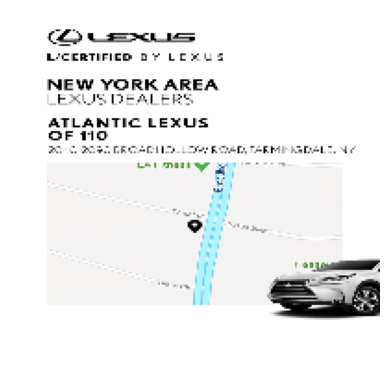

In [10]:
plt.imshow(combined_images[0])
plt.axis('off')  # Hide the axis
plt.show()

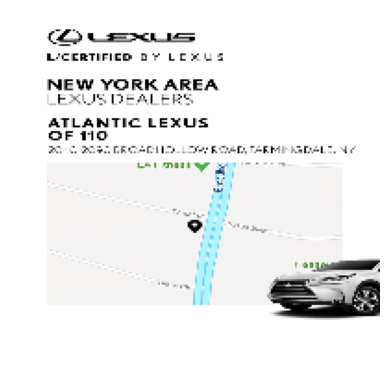

In [11]:
plt.imshow(combined_images[1])
plt.axis('off')  # Hide the axis
plt.show()

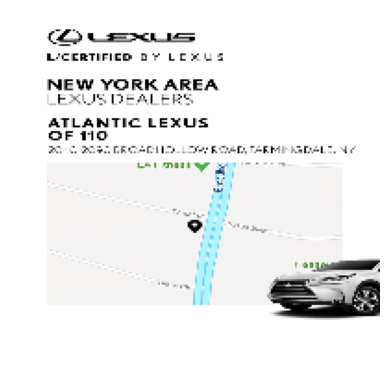

In [12]:
plt.imshow(combined_images[2])
plt.axis('off')  # Hide the axis
plt.show()

In [13]:
import cv2
import numpy as np

def combine_images(base_image, overlays):
    """
    Combine multiple overlay images into the base image at specified regions.

    Parameters:
    base_image (np.ndarray): The base image where overlay images will be placed.
    overlays (list of tuples): List of overlay images and their regions. Each tuple should be in the format
                               (overlay_image, (x, y)), where (x, y) is the top-left corner of the region.

    Returns:
    np.ndarray: The combined image with overlays.
    """
    # Make a copy of the base image to modify
    combined_image = base_image.copy()
    
    # Iterate through the overlay images and their regions
    for overlay, (x, y) in overlays:
        # Get the dimensions of the overlay image
        h, w = overlay.shape[:2]
        
        # Ensure the region is within the bounds of the base image
        if y + h > combined_image.shape[0] or x + w > combined_image.shape[1]:
            raise ValueError("Overlay image exceeds the bounds of the base image at the specified location.")
        
        # Place the overlay image on the base image
        combined_image[y:y+h, x:x+w] = overlay

    return combined_image


In [24]:
car_image = '../data/0a59be2e7dd53d6de11a10ce3649c081/game_endframe.png'
base_image = '../data/0a59be2e7dd53d6de11a10ce3649c081/landing_1.png'
cta_image = '../data/0a59be2e7dd53d6de11a10ce3649c081/cta.png'


In [22]:
# Paths to images
car_image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/game_endframe.png'
base_image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/landing_1.png'
cta_image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/cta.png'

# Load the images using cv2.imread
base_image = cv2.imread(base_image_path)
cta_image = cv2.imread(cta_image_path)
car_image = cv2.imread(car_image_path)

# Check the loaded images dimensions
print(f"Base image shape: {base_image.shape}")
print(f"CTA image shape: {cta_image.shape}")
print(f"Car image shape: {car_image.shape}")

Base image shape: (900, 600, 3)
CTA image shape: (64, 300, 3)
Car image shape: (119, 224, 3)


In [16]:
cv2.imread(base_image).shape

(900, 600, 3)

In [29]:
overlays = [
    (cv2.imread(cta_image), (300, 100)), 
    (cv2.imread(car_image), (100, 200)) 
]

In [30]:
combined_image = combine_images(cv2.imread(base_image), overlays)

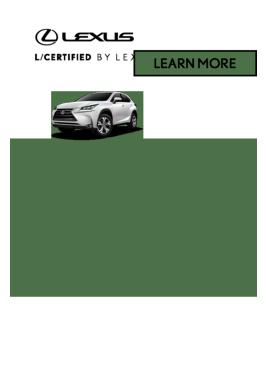

In [32]:
plt.imshow(combined_image)
plt.axis('off')  # Hide the axis
plt.show()

In [2]:
import cv2
import matplotlib.pyplot as plt

def resize_to_fit(image, max_height, max_width):
    """
    Resize an image to fit within the given dimensions while maintaining aspect ratio.

    Parameters:
    image (np.ndarray): The image to resize.
    max_height (int): The maximum height of the resized image.
    max_width (int): The maximum width of the resized image.

    Returns:
    np.ndarray: The resized image.
    """
    h, w = image.shape[:2]
    if h > max_height or w > max_width:
        scaling_factor = min(max_height / h, max_width / w)
        new_size = (int(w * scaling_factor), int(h * scaling_factor))
        return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    return image

def combine_images_grid(base_image, overlays):
    """
    Combine multiple overlay images into the base image using a 3x3 grid system.

    Parameters:
    base_image (np.ndarray): The base image where overlay images will be placed.
    overlays (list of tuples): List of overlay images and their grid positions. Each tuple should be in the format
                               (overlay_image, (grid_row, grid_col)), where (grid_row, grid_col) specifies the grid cell.

    Returns:
    np.ndarray: The combined image with overlays.
    """
    # Make a copy of the base image to modify
    combined_image = base_image.copy()
    
    # Get the dimensions of the base image
    base_h, base_w = combined_image.shape[:2]
    
    # Calculate the size of each grid cell
    cell_h, cell_w = base_h // 3, base_w // 3
    
    # Iterate through the overlay images and their grid positions
    for overlay, (grid_row, grid_col) in overlays:
        # Resize the overlay to fit within the grid cell
        overlay = resize_to_fit(overlay, cell_h, cell_w)
        
        # Get the dimensions of the overlay image
        overlay_h, overlay_w = overlay.shape[:2]
        
        # Calculate the top-left corner of the grid cell
        x = grid_col * cell_w
        y = grid_row * cell_h
        
        # Place the overlay image in the center of the grid cell
        center_x = x + (cell_w - overlay_w) // 2
        center_y = y + (cell_h - overlay_h) // 2
        
        # Ensure the region is within the bounds of the base image
        if center_y + overlay_h > base_h or center_x + overlay_w > base_w:
            raise ValueError("Overlay image exceeds the bounds of the base image at the specified location.")
        
        # Place the overlay image on the base image
        combined_image[center_y:center_y+overlay_h, center_x:center_x+overlay_w] = overlay

    return combined_image

# Paths to images
car_image_path = '../data/0a18978cdc8b64f900b0db6a297eb99d/end-copy.jpg'
base_image_path = '../data/0a18978cdc8b64f900b0db6a297eb99d/end-image.jpg'
cta_image_path = '../data/0a18978cdc8b64f900b0db6a297eb99d/cta.png'

# Load the images using cv2.imread
base_image = cv2.imread(base_image_path)
cta_image = cv2.imread(cta_image_path)
car_image = cv2.imread(car_image_path)

# Check the loaded images dimensions
print(f"Base image shape: {base_image.shape}")
print(f"CTA image shape: {cta_image.shape}")
print(f"Car image shape: {car_image.shape}")

# Define the overlays with their grid positions
overlays = [
    (cta_image, (0, 2)),  # Place cta_image in the top-right grid cell
    (car_image, (1, 1))   # Place car_image in the center grid cell
]

# Combine the images using the grid system
combined_image = combine_images_grid(base_image, overlays)



Base image shape: (451, 600, 3)
CTA image shape: (67, 254, 3)
Car image shape: (450, 600, 3)


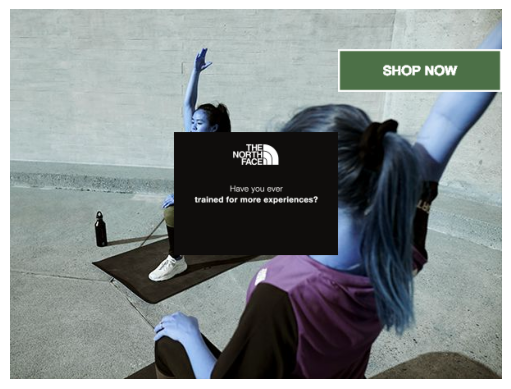

In [3]:
plt.imshow(combined_image)
plt.axis('off')  # Hide the axis
plt.show()

In [10]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def resize_to_fit(image, max_height, max_width):
    """
    Resize an image to fit within the given dimensions while maintaining aspect ratio.

    Parameters:
    image (np.ndarray): The image to resize.
    max_height (int): The maximum height of the resized image.
    max_width (int): The maximum width of the resized image.

    Returns:
    np.ndarray: The resized image.
    """
    h, w = image.shape[:2]
    if h > max_height or w > max_width:
        scaling_factor = min(max_height / h, max_width / w)
        new_size = (int(w * scaling_factor), int(h * scaling_factor))
        return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    return image

def extract_text_from_image(image):
    """
    Extract text from an image using Tesseract OCR.

    Parameters:
    image (np.ndarray): The image from which to extract text.

    Returns:
    str: The extracted text.
    """
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    text = pytesseract.image_to_string(pil_image)
    return text

def combine_images_grid_with_text(base_image, overlays):
    """
    Combine multiple overlay images into the base image using a 3x3 grid system
    and extract text from the overlay images to place on the base image.

    Parameters:
    base_image (np.ndarray): The base image where overlay images will be placed.
    overlays (list of tuples): List of overlay images and their grid positions. Each tuple should be in the format
                               (overlay_image, (grid_row, grid_col)), where (grid_row, grid_col) specifies the grid cell.

    Returns:
    np.ndarray: The combined image with overlays.
    """
    # Make a copy of the base image to modify
    combined_image = base_image.copy()
    
    # Get the dimensions of the base image
    base_h, base_w = combined_image.shape[:2]
    
    # Calculate the size of each grid cell
    cell_h, cell_w = base_h // 3, base_w // 3
    
    # Iterate through the overlay images and their grid positions
    for overlay, (grid_row, grid_col) in overlays:
        # Resize the overlay to fit within the grid cell
        overlay = resize_to_fit(overlay, cell_h, cell_w)
        
        # Extract text from the overlay image
        text = extract_text_from_image(overlay)
        
        # Calculate the top-left corner of the grid cell
        x = grid_col * cell_w
        y = grid_row * cell_h
        
        # Place the text in the center of the grid cell
        center_x = x + cell_w // 2
        center_y = y + cell_h // 2
        
        # Define the text position
        text_position = (center_x, center_y)
        
        # Place the text on the base image
        cv2.putText(combined_image, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    
    return combined_image

# Paths to images
car_image_path = '../data/0a18978cdc8b64f900b0db6a297eb99d/end-copy.jpg'
base_image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/landing_1.png'
cta_image_path = '../data/0a18978cdc8b64f900b0db6a297eb99d/cta.png'

# Load the images using cv2.imread
base_image = cv2.imread(base_image_path)
cta_image = cv2.imread(cta_image_path)
car_image = cv2.imread(car_image_path)

# Check the loaded images dimensions
print(f"Base image shape: {base_image.shape}")
print(f"CTA image shape: {cta_image.shape}")
print(f"Car image shape: {car_image.shape}")

# Define the overlays with their grid positions
overlays = [
    (cta_image, (0, 2)),  # Extract text from cta_image and place it in the top-right grid cell
    (car_image, (1, 1))   # Extract text from car_image and place it in the center grid cell
]

# Combine the images using the grid system with text extraction
combined_image = combine_images_grid_with_text(base_image, overlays)


Base image shape: (900, 600, 3)
CTA image shape: (67, 254, 3)
Car image shape: (450, 600, 3)


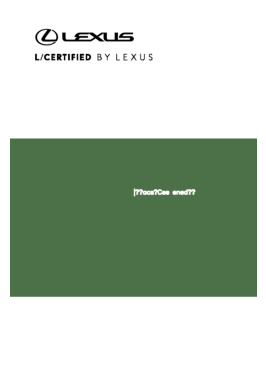

In [11]:
plt.imshow(combined_image)
plt.axis('off')  # Hide the axis
plt.show()

In [18]:
image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/game_1.png'
base_image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/landing_1.png'
cta_image_path = '../data/0a59be2e7dd53d6de11a10ce3649c081/cta.png'

In [19]:
image_imread = cv2.imread(image_path)

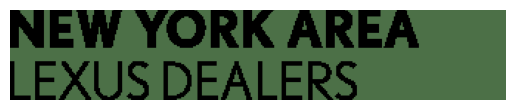

In [20]:
plt.imshow(image_imread)
plt.axis('off')  # Hide the axis
plt.show()

In [25]:
def change_background(image_path, background_color=(255, 0, 0), threshold=100):
    """
    Change the background of an image to a specified color.

    Parameters:
    image_path (str): Path to the input image.
    background_color (tuple): RGB color to set as the new background.
    threshold (int): Threshold value for background segmentation.

    Returns:
    new_image (np.array): Image with the new background.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path '{image_path}' not found.")
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold to get the mask
    _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    
    # Create a background image with the specified color
    background = np.full_like(image, background_color, dtype=np.uint8)
    
    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)
    
    # Use the mask to extract the foreground
    foreground = cv2.bitwise_and(image, image, mask=mask_inv)
    
    # Use the inverted mask to extract the background from the background image
    background = cv2.bitwise_and(background, background, mask=mask)
    
    # Combine the foreground and the new background
    new_image = cv2.add(foreground, background)
    
    return new_image

In [26]:
new_image = change_background(image_path)

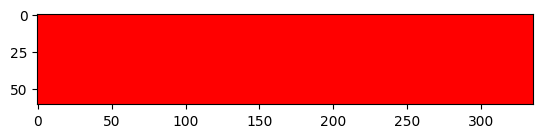

In [27]:
plt.imshow(new_image)

In [29]:
extract_text_from_image(image_imread)

'NEW YORK AREA\n1EXUS DEALERS\n\x0c'